In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

Using TensorFlow backend.


In [3]:
# Initializing the CNN
classifier = Sequential()

In [4]:
# Convolution
# help(Convolution2D)
# 32 Feature Map 3*3 Dim of Feature Detector
classifier.add(Convolution2D(32, 3, 3, input_shape = (64, 64, 3), activation = 'relu'))

C:\Users\mohdt\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(64, 64, 3..., activation="relu")`
  after removing the cwd from sys.path.


In [5]:
# Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

In [6]:
# Flattening
classifier.add(Flatten())

In [7]:
# Full Connection
classifier.add(Dense(output_dim = 128, activation = 'relu'))
classifier.add(Dense(output_dim = 2, activation = 'softmax'))

C:\Users\mohdt\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=128)`
  
C:\Users\mohdt\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="softmax", units=2)`
  This is separate from the ipykernel package so we can avoid doing imports until


In [8]:
# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [9]:
import os
filenames = os.listdir("D:/Softwares/Programs/DataSet/dogs-vs-cats/train/")
categories = []
for filename in filenames:
    category = filename.split('.')[0]
    if category == 'dog':
        categories.append(1)
    else:
        categories.append(0)

df = pd.DataFrame({'filename': filenames,'category': categories})

In [10]:
df.head()
df.tail()

,filename,category
24995,dog.9995.jpg,1
24996,dog.9996.jpg,1
24997,dog.9997.jpg,1
24998,dog.9998.jpg,1
24999,dog.9999.jpg,1


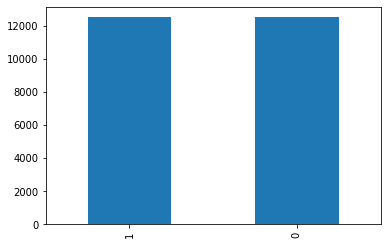

In [11]:
df['category'].value_counts().plot.bar()

In [12]:
df["category"] = df["category"].replace({0: 'cat', 1: 'dog'}) 

In [13]:
from sklearn.model_selection import train_test_split
train_df, validate_df = train_test_split(df, test_size=0.20, random_state=42)
train_df = train_df.reset_index(drop=True)
validate_df = validate_df.reset_index(drop=True)

In [14]:
train_df.shape, validate_df.shape

((20000, 2), (5000, 2))

In [19]:
# Fitting the CNN to Images
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)
training_set = train_datagen.flow_from_dataframe(train_df,
                                                 "D:/Softwares/Programs/DataSet/dogs-vs-cats/train/",
                                                 target_size=(64, 64),
                                                 x_col='filename',
                                                 y_col='category',
                                                 batch_size=15,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_dataframe(validate_df,
                                            'D:/Softwares/Programs/DataSet/dogs-vs-cats/train/',
                                            target_size=(64, 64),
                                            x_col='filename',
                                            y_col='category',
                                            batch_size=15,
                                            class_mode = 'categorical')

Found 20000 validated image filenames belonging to 2 classes.
Found 5000 validated image filenames belonging to 2 classes.


In [20]:
temp = classifier.fit_generator(training_set, steps_per_epoch=20000, nb_epoch = 5, validation_data = test_set, validation_steps = 5000)

C:\Users\mohdt\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:1: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  """Entry point for launching an IPython kernel.
C:\Users\mohdt\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras.pre..., steps_per_epoch=20000, validation_data=<keras.pre..., validation_steps=5000, epochs=5)`
  """Entry point for launching an IPython kernel.


Epoch 1/5
20000/20000 [==============================] - 2558s 128ms/step - loss: 0.4612 - accuracy: 0.7789 - val_loss: 0.4608 - val_accuracy: 0.7649
Epoch 2/5
20000/20000 [==============================] - 1955s 98ms/step - loss: 0.3149 - accuracy: 0.8634 - val_loss: 0.4764 - val_accuracy: 0.7492
Epoch 3/5
20000/20000 [==============================] - 3102s 155ms/step - loss: 0.2237 - accuracy: 0.9094 - val_loss: 0.9539 - val_accuracy: 0.7569
Epoch 4/5
20000/20000 [==============================] - 1909s 95ms/step - loss: 0.1682 - accuracy: 0.9347 - val_loss: 0.6153 - val_accuracy: 0.7528
Epoch 5/5
20000/20000 [==============================] - 1935s 97ms/step - loss: 0.1364 - accuracy: 0.9489 - val_loss: 0.7551 - val_accuracy: 0.7639


In [22]:
from keras.models import model_from_json

# serialize model to JSON
model_json = classifier.to_json()
with open("dogcat.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
classifier.save_weights("dogcat.h5")
 
# load json and create model
'''json_file = open('/content/drive/My Drive/dogs-vs-cats/model/model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("/content/drive/My Drive/dogs-vs-cats/model/model.h5")
 
# evaluate loaded model on test data
loaded_model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
score = loaded_model.evaluate(X, Y, verbose=0)'''

'json_file = open(\'/content/drive/My Drive/dogs-vs-cats/model/model.json\', \'r\')\nloaded_model_json = json_file.read()\njson_file.close()\nloaded_model = model_from_json(loaded_model_json)\n# load weights into new model\nloaded_model.load_weights("/content/drive/My Drive/dogs-vs-cats/model/model.h5")\n \n# evaluate loaded model on test data\nloaded_model.compile(loss=\'binary_crossentropy\', optimizer=\'rmsprop\', metrics=[\'accuracy\'])\nscore = loaded_model.evaluate(X, Y, verbose=0)'

In [23]:
test_filenames = os.listdir("D:/Softwares/Programs/DataSet/dogs-vs-cats/test1/")
test_df = pd.DataFrame({
    'filename': test_filenames
})
nb_samples = test_df.shape[0]

In [26]:
test_gen = ImageDataGenerator(rescale=1./255)
test_generator = test_gen.flow_from_dataframe(
    test_df, 
    "D:/Softwares/Programs/DataSet/dogs-vs-cats/test1/",
    x_col='filename',
    y_col=None,
    class_mode=None,
    target_size=(64,64),
    batch_size=15,
    shuffle=False
)

Found 12500 validated image filenames.


In [33]:
predict = classifier.predict_generator(test_generator, steps=np.ceil(nb_samples/15))

In [34]:
len(predict)

12500

In [35]:
test_df['category'] = np.argmax(predict, axis=-1)

In [37]:
label_map = dict((v,k) for k,v in training_set.class_indices.items())
test_df['category'] = test_df['category'].replace(label_map)
test_df['category'] = test_df['category'].replace({ 'dog': 1, 'cat': 0 })

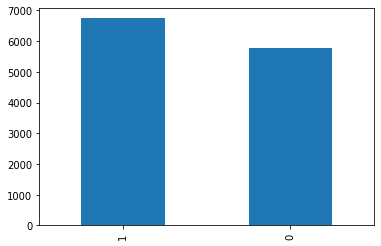

In [38]:
test_df['category'].value_counts().plot.bar()

In [39]:
submission_df = test_df.copy()
submission_df['id'] = submission_df['filename'].str.split('.').str[0]
submission_df['label'] = submission_df['category']
submission_df.drop(['filename', 'category'], axis=1, inplace=True)
submission_df.to_csv('submission.csv', index=False)